In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
car = pd.read_csv('car.csv')
cars = car[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made', 'MPG']]
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     398 non-null    int64  
 1   Displacement  398 non-null    float64
 2   Horsepower    398 non-null    object 
 3   Weight        398 non-null    int64  
 4   Acceleration  398 non-null    float64
 5   Model Year    398 non-null    int64  
 6   US Made       398 non-null    int64  
 7   MPG           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [29]:
cars

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made,MPG
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,27.0
394,4,97.0,52,2130,24.6,82,0,44.0
395,4,135.0,84,2295,11.6,82,1,32.0
396,4,120.0,79,2625,18.6,82,1,28.0


In [30]:
#removing 6 rows because of inconvinient data
cars['Horsepower'] = cars['Horsepower'].replace('?', np.nan)
cars[cars['Horsepower'].isnull()].index.tolist()
cars = cars.drop(labels=[32, 126, 330, 336, 354, 374], axis=0)
cars['Horsepower'] = cars['Horsepower'].astype('int64')
cars

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made,MPG
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,27.0
394,4,97.0,52,2130,24.6,82,0,44.0
395,4,135.0,84,2295,11.6,82,1,32.0
396,4,120.0,79,2625,18.6,82,1,28.0


In [31]:
cars.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made,MPG
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,46.600000


<AxesSubplot:>

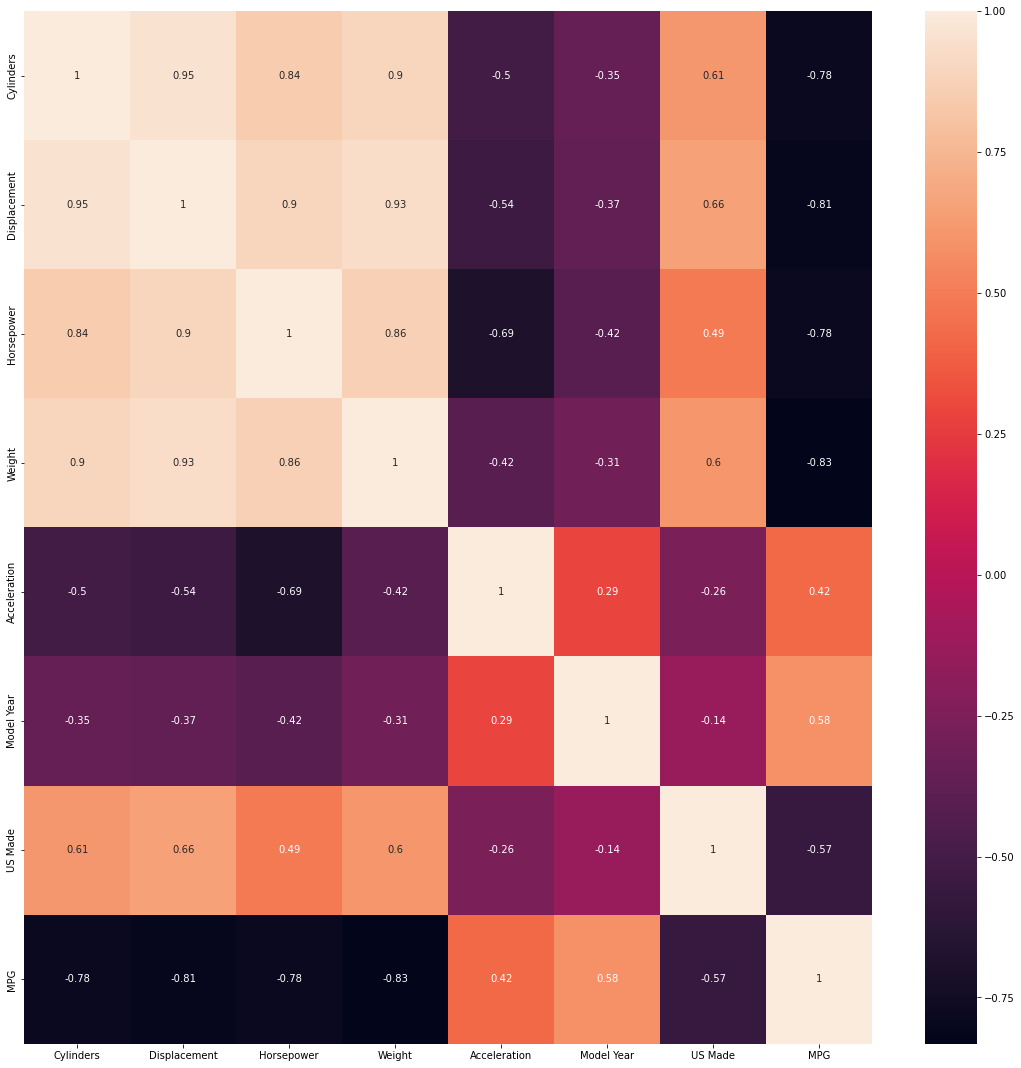

In [32]:
#seaborn correlation heatmap
plt.figure(figsize = (19,19))
sns.heatmap(cars.corr(), annot=True)
#plt.savefig('ALL_vs_MPG.png', dpi=500)

In [55]:
#splitting required columns in test and train dataset
x = cars.loc[:, ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']]
y = cars['MPG']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.23)

In [56]:
#checking out the splitted datasets
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (301, 7)
X_test: (91, 7)
Y_train: (301,)
Y_test: (91,)


In [57]:
#fitting training datasets in the Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
#to print an array of preditions
y_pred=lr.predict(x_test)
y_pred

array([22.82771708, 27.81613088,  6.34203432, 30.18416498, 23.87575262,
       35.5183199 , 13.09540651, 20.87101801, 27.11902667, 25.49355204,
       26.53650779, 22.81667776, 26.88718618, 21.1252257 , 25.01516031,
       23.8757603 , 26.54414493, 32.6652066 , 25.74339266, 28.65051075,
       32.05111687, 17.48322188, 25.85689757, 29.36283345,  8.97426513,
       32.58228053, 23.28064874, 30.72699335, 29.36517341, 18.0579606 ,
       23.95682579, 12.06538688, 16.67987114, 26.76092283, 11.49242584,
       35.38119395, 29.30635389, 10.51821639, 20.71421661, 28.94041268,
       29.12429944, 27.98780725, 36.03852078, 26.25095905, 29.76120667,
       11.42322309, 12.34050574,  9.852604  , 13.31239359, 20.33456941,
       35.77011879, 11.45288583, 23.50386581, 31.46474354, 14.66450137,
       22.73093287, 26.63645839, 19.48625473, 26.29414053, 25.64073826,
       32.47024636, 36.2360766 , 31.62690078, 29.3997319 , 29.27275147,
       16.42942583, 17.81305381, 17.16010275, 22.66556825, 29.91

In [59]:
#to check the accuracy(r2_score) of the model
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.22


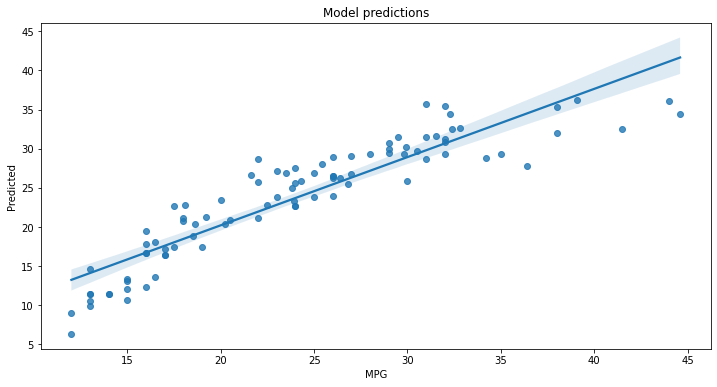

In [61]:
#visualizing the model working
plt.figure(figsize = (12,6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model predictions')
sns.regplot(x=y_test,y=y_pred);
#plt.savefig('MODEL PREDICTIONS.png', dpi=700)

In [65]:
#Ordinary Least Squares regression 
X = sm.add_constant(x_train)
EST = sm.OLS(y_train, X)
EST1 = EST.fit()
print(EST1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          2.62e-105
Time:                        21:48:28   Log-Likelihood:                -786.65
No. Observations:                 301   AIC:                             1589.
Df Residuals:                     293   BIC:                             1619.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.7717      5.403     -3.104   

Feature: 0, Score: -0.48309
Feature: 1, Score: 0.02410
Feature: 2, Score: -0.01774
Feature: 3, Score: -0.00676
Feature: 4, Score: 0.07907
Feature: 5, Score: 0.78083
Feature: 6, Score: -2.74695


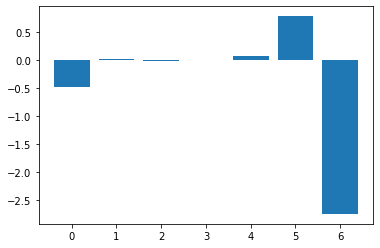

<Figure size 1080x576 with 0 Axes>

In [64]:
lr.fit(x, y)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize = (15,8))
plt.show()

In [18]:
#to retrieve 3 most import features for positive influence on MPG
pd.DataFrame(lr.coef_, x.columns, columns=['Coeff']).nlargest(n=3, columns=['Coeff'])

,Coeff
Model Year,0.780834
Acceleration,0.079070
Displacement,0.024100


In [24]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 2.6166818785636825
MSE 12.264544907761554
RMSE 3.50207722755532
